In [10]:
import json
import time
import math
import os
import collections
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

%matplotlib inline 

In [2]:
class Data():
    
    def __init__(self, fp):
        
        self.fp = fp
        self.load_data()
        self.shuffle()
        self.get_sample_weights()
        
    def load_data(self):
        start = time.time()
        try:
            self.x = x
            self.y = y
        except:
            with open('{}.json'.format(self.fp), 'r') as file:
                temp = json.load(file)
            self.x = np.array([np.array(vec) for vec in temp['x']])
            self.y = np.array(temp['y'])
        print('X shape: {}'.format(self.x.shape))
        print('Y shape: {}'.format(self.y.shape))
        
    def get_sample_weights(self):
        weight_dic = {0: np.sum(self.y)/self.y.shape[0]/np.sum(1-self.y)}
        weight_dic[1] = (1-weight_dic[0])/np.sum(self.y)
        self.weights = np.array([weight_dic[self.y[index]] for index in range(self.y.shape[0])])
        
    def shuffle(self):
        temp_x = np.zeros(self.x.shape)
        temp_y = np.zeros(self.y.shape)
        m = self.y.shape[0]
        index = np.arange(m)
        np.random.shuffle(index)
        for x in range(m):
            value = int(index[int(x)])
            temp_x[x,:] = self.x[value,:]
            temp_y[x] = self.y[index[int(x)]]
        self.x = temp_x
        self.y = temp_y

In [3]:
def random_forest_classifier(features, targets):
    model = RandomForestClassifier()
    model.fit(features, targets)
    return model

In [4]:
def calc_accuracy(y_true, y_pred):
    true_positive = calc_true_positive(y_true, y_pred)
    true_negative = calc_true_negative(y_true, y_pred)
    return (true_positive + true_negative)/y_true.shape[0]

def calc_precision(y_true, y_pred):
    true_pos = calc_true_positive(y_true, y_pred)
    return true_pos/np.sum(y_pred)

def calc_recall(y_true, y_pred):
    true_pos = calc_true_positive(y_true, y_pred)
    return true_pos/np.sum(y_true)

def calc_f_one(y_true, y_pred):
    prec = calc_precision(y_true, y_pred)
    rec = calc_recall(y_true, y_pred)
    return 2*prec*rec/(prec+rec)
    
def calc_true_positive(y_true, y_pred):
    return np.sum(y_true*y_pred)

def calc_true_negative(y_true, y_pred):
    return np.sum((1-y_true)*(1-y_pred))

def calc_false_positive(y_true, y_pred):
    return np.sum((1-y_true)*(y_pred))

def calc_false_negative(y_true, y_pred):
    return np.sum((1-y_pred)*y_true)

In [14]:
def calc_roc(y_true, predictions, threshold):
    y_pred = 1*(predictions>=threshold)
    false_positive = calc_false_positive(y_true, y_pred)
    true_negative = calc_true_negative(y_true, y_pred)
    true_positive = calc_true_positive(y_true, y_pred)
    false_negative = calc_false_negative(y_true, y_pred)
    false_positive_rate = false_positive/(false_positive+true_negative) # x-axis
    true_positive_rate = true_positive/(true_positive+false_negative) # y-axis
    return (false_positive_rate, true_positive_rate)

def roc_curve(y_true, predictions, num_steps, title=None):
    false_positive_list = []
    true_positive_list = []
    for step in range(0, num_steps+2):
        false_positive_rate, true_positive_rate = calc_roc(y_true, predictions, step/num_steps)
        false_positive_list.append(false_positive_rate)
        true_positive_list.append(true_positive_rate)
    plot = plot_curve(false_positive_list, true_positive_list, title=title)
    return plot

def plot_curve(x_values, y_values, title=None):
    fig = plt.figure()
    ax = plt.axes()
    plt.plot(x_values, y_values)
    plt.plot([x/1000 for x in range(1000)], [x/1000 for x in range(1000)])
    if title is not None:
        plt.title(title)
    return fig

In [6]:
def main(fp_type):
    data = Data(fp_type)
    train_x, test_x, train_y, test_y = train_test_split(data.x, data.y, train_size=0.8)
    model = random_forest_classifier(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = calc_accuracy(test_y, predictions)
    precision = calc_precision(test_y, predictions)
    recall = calc_recall(test_y, predictions)
    f_one = calc_f_one(test_y, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f_one': f_one}

X shape: (17201, 1024)
Y shape: (17201,)


/home3/mbrock/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


X shape: (17201, 56)
Y shape: (17201,)


/home3/mbrock/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


X shape: (17201, 312)
Y shape: (17201,)


/home3/mbrock/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


X shape: (17201, 168)
Y shape: (17201,)


/home3/mbrock/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


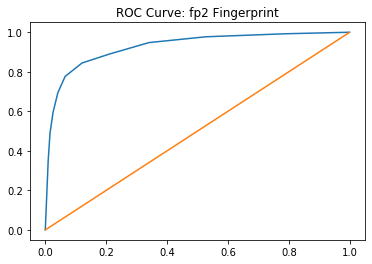

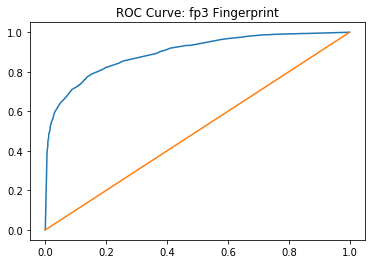

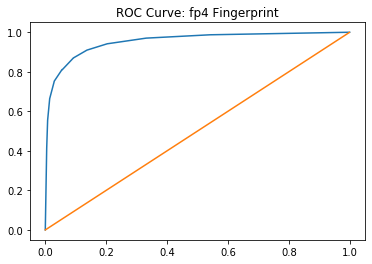

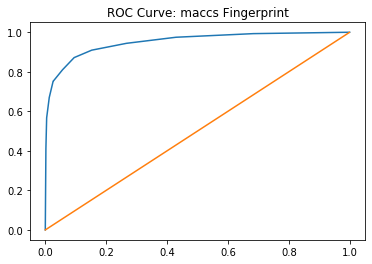

In [15]:
plot_dic = {}
for fp in ['fp2', 'fp3', 'fp4', 'maccs']:
    data = Data(fp)
    train_x, test_x, train_y, test_y = train_test_split(data.x, data.y, train_size=0.8)
    model = random_forest_classifier(train_x, train_y)
    probabilities = model.predict_proba(test_x)
    plot = roc_curve(test_y, probabilities[:,1], 100, title='ROC Curve: {} Fingerprint'.format(fp))
    plot_dic[fp] = plot
pdf = matplotlib.backends.backend_pdf.PdfPages("Random Forest ROC Curves.pdf")
for key in plot_dic.keys():
    pdf.savefig(plot_dic[key])
pdf.close()